In [1]:
import pandas as pd
import missingno as msno 

In [2]:
# Ler o arquivo Parquet
df = pd.read_parquet('Dados/df_ativas_ultimo_trimestre_2023.parquet')
df.head()

,CNPJ,UF,MUNICIPIO,CEP,DataSituacaoCadastral,DataCadastro,Porte,CNAE_Principal,CNAE_Secundario,Setor,Região,Descricao_CNAE_Principal
0,42804324000394,SP,2941,15315000,2023-11-03,2023-11-03,DEMAIS,0151201,0115600,Agropecuaria,Sudeste,Criação de bovinos para corte
1,42806249000481,MG,4371,32040027,2023-11-14,2023-11-14,DEMAIS,4635499,"4635402,4723700,4789001",Comercio,Sudeste,Comércio atacadista de bebidas não especificad...
2,42879032000230,BA,3873,44445450,2023-11-14,2023-11-14,ME,3101200,"4752100,4753900,4754701,4754702",Industria,Nordeste,Fabricação de móveis com predominância de madeira
3,43952585000233,SP,6839,15630000,2023-11-10,2023-11-10,DEMAIS,0139306,None,Agropecuaria,Sudeste,Cultivo de seringueira
4,43975859000200,SP,6645,12614899,2023-10-05,2023-10-05,DEMAIS,0121101,"0151201,0151202",Agropecuaria,Sudeste,"Horticultura, exceto morango"


In [3]:
# Ler o arquivo Parquet
df_m= pd.read_parquet('metricas_globais_Agropecuaria.parquet')
df_m.head()

,Setor,Número de Nós,Número de Arestas,Coeficiente de Agrupamento Médio,Comprimento Médio do Caminho (Ponderado),Diâmetro (Ponderado),Densidade,Número de Comunidades
0,Agropecuaria,1203,88813,0.933615,5.557555,12.0,0.122839,11


In [4]:
# Ler o arquivo Parquet
df_c = pd.read_parquet('metricas_Agropecuaria.parquet')
df_c.head()

,CNPJ,Centralidade de Grau Ponderada,Comunidade
0,52467912000171,0.519551,0
1,52469230000106,0.115225,1
2,52470603000150,0.111897,1
3,52472376000100,0.252912,2
4,52477243000119,0.187604,3


In [5]:
df_c["Centralidade de Grau Ponderada"].max()

0.56738768718802

In [6]:
df.tail()

,CNPJ,UF,MUNICIPIO,CEP,DataSituacaoCadastral,DataCadastro,Porte,CNAE_Principal,CNAE_Secundario,Setor,Região,Descricao_CNAE_Principal
211519,54569187000178,MT,9067,78043409,2023-10-25,2023-10-25,DEMAIS,6911701,None,Servicos,Centro_Oeste,Serviços advocatícios
211520,54569992000100,RS,8681,95675056,2023-12-15,2023-12-15,DEMAIS,8112500,None,Servicos,Sul,Condomínios prediais
211521,54570021000171,MA,0803,65900410,2023-11-21,2023-11-21,DEMAIS,6911701,None,Servicos,Nordeste,Serviços advocatícios
211522,54570394000142,CE,1405,62270000,2023-12-13,2023-12-13,DEMAIS,9492800,None,Servicos,Nordeste,Atividades de organizações políticas
211523,54572263000102,ES,5623,29305352,2023-11-30,2023-11-30,DEMAIS,9492800,None,Servicos,Sudeste,Atividades de organizações políticas


In [7]:
df.describe()

,DataSituacaoCadastral,DataCadastro
count,211524,211524
mean,2023-11-13 17:51:30.645033,2023-11-13 17:50:51.840926
min,2023-10-02 00:00:00,2023-10-02 00:00:00
25%,2023-10-23 00:00:00,2023-10-23 00:00:00
50%,2023-11-14 00:00:00,2023-11-14 00:00:00
75%,2023-12-06 00:00:00,2023-12-06 00:00:00
max,2023-12-31 00:00:00,2023-12-31 00:00:00


In [8]:
df = df.merge(df_c, on='CNPJ')

<Axes: >

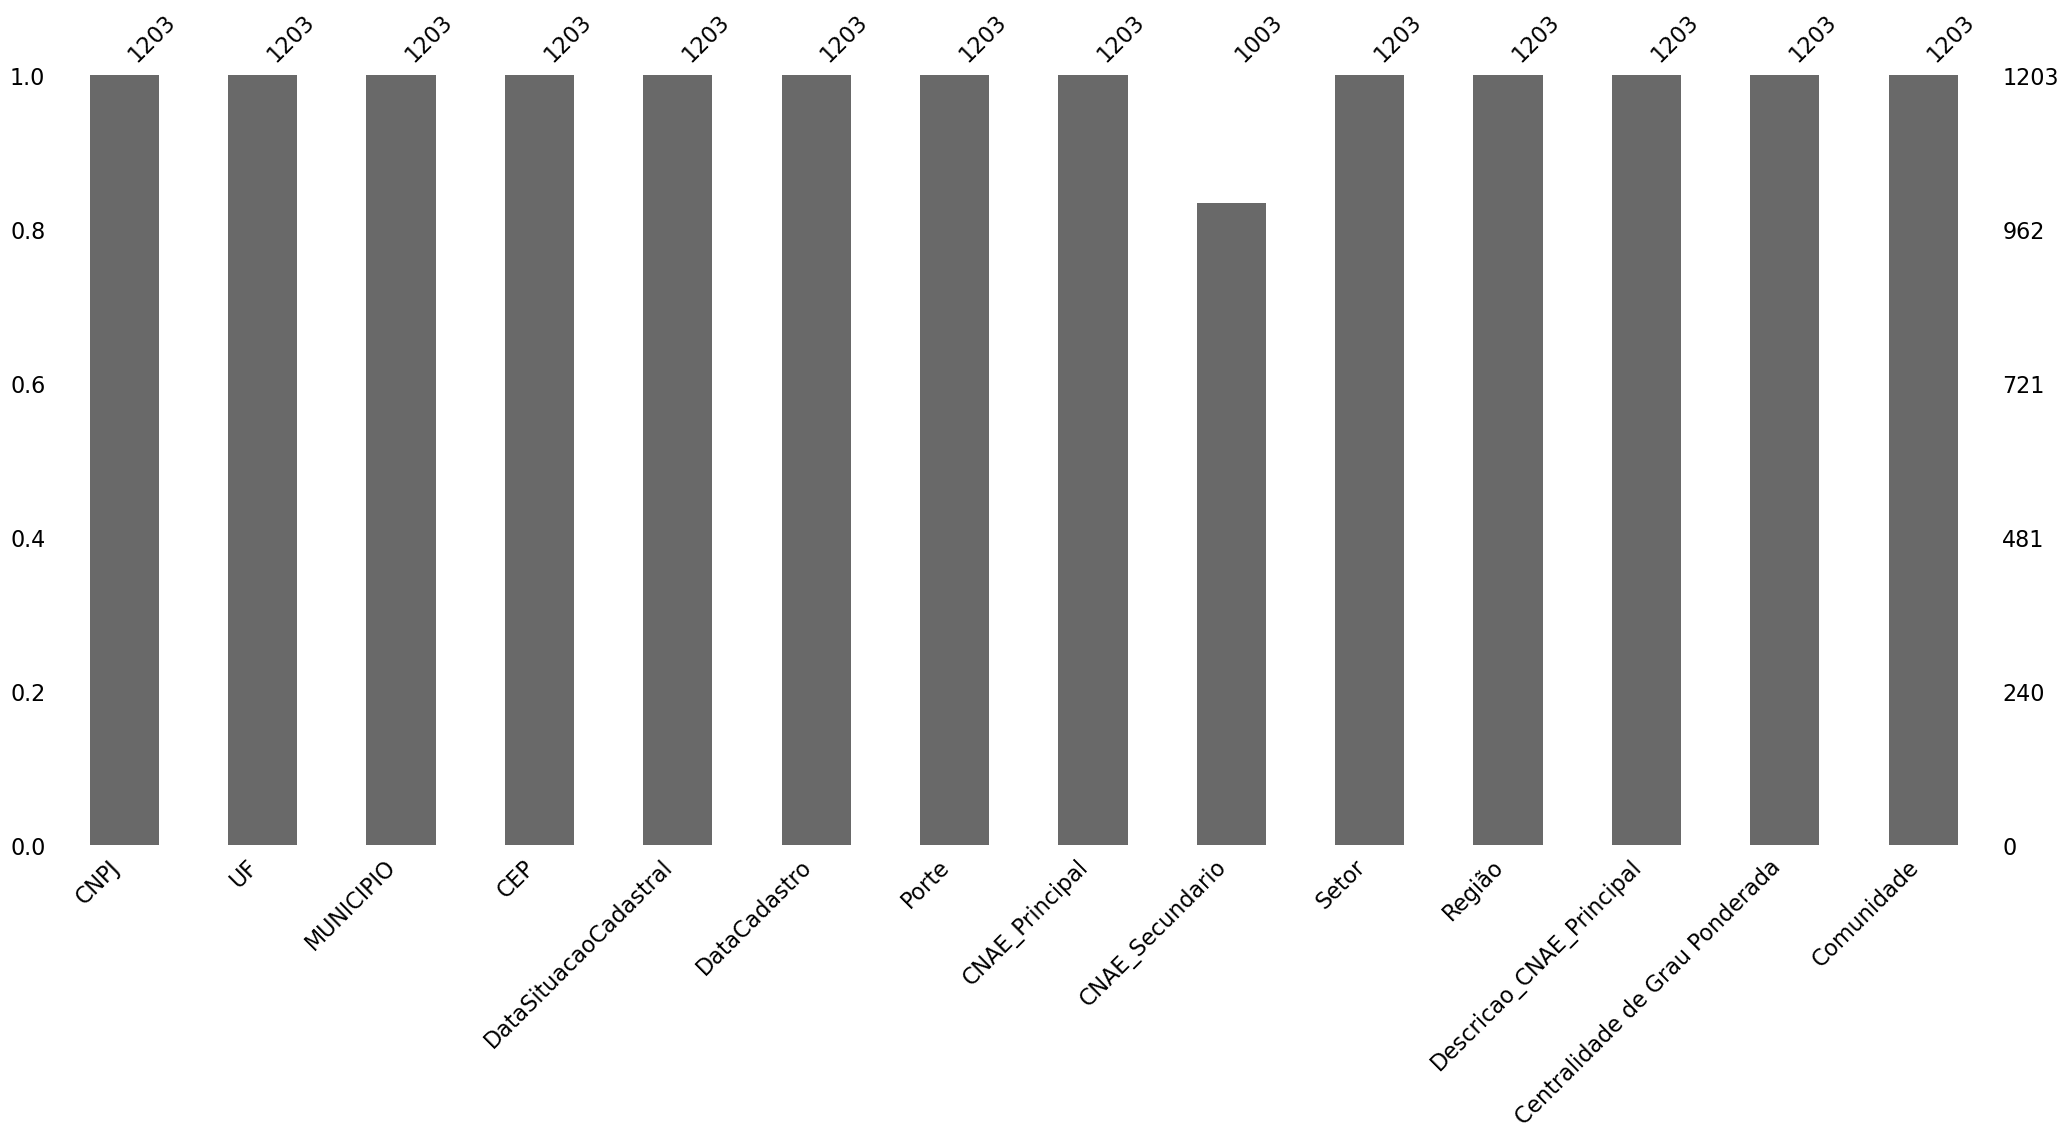

In [9]:
msno.bar(df)

In [10]:
df

,CNPJ,UF,MUNICIPIO,CEP,DataSituacaoCadastral,DataCadastro,Porte,CNAE_Principal,CNAE_Secundario,Setor,Região,Descricao_CNAE_Principal,Centralidade de Grau Ponderada,Comunidade
0,52467912000171,MG,4185,38660000,2023-10-09,2023-10-09,ME,0161003,"0121101,0161002,4120400,4330404,4399103,439919...",Agropecuaria,Sudeste,"Serviço de preparação de terreno, cultivo e co...",0.519551,0
1,52469230000106,SP,6133,14820478,2023-10-09,2023-10-09,EPP,0161003,"4921301,4930201,4930202,7731400",Agropecuaria,Sudeste,"Serviço de preparação de terreno, cultivo e co...",0.115225,1
2,52470603000150,MG,2893,39508000,2023-10-09,2023-10-09,EPP,0161003,"0161001,4930201,4930202,7731400,7739099",Agropecuaria,Sudeste,"Serviço de preparação de terreno, cultivo e co...",0.111897,1
3,52472376000100,ES,5623,29300020,2023-10-09,2023-10-09,ME,0151201,"0111302,0111399,0133499,0134200,0151202",Agropecuaria,Sudeste,Criação de bovinos para corte,0.252912,2
4,52477243000119,GO,9653,76520000,2023-10-09,2023-10-09,EPP,0151201,"0111301,0111302,0115600",Agropecuaria,Centro_Oeste,Criação de bovinos para corte,0.187604,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,53325167000199,PE,2563,55435000,2023-12-29,2023-12-29,ME,0151201,"0151202,1011201",Agropecuaria,Nordeste,Criação de bovinos para corte,0.250000,2
1199,53325672000133,MA,0140,65968000,2023-12-29,2023-12-29,ME,0115600,"0111301,0111302,0111399",Agropecuaria,Nordeste,Cultivo de soja,0.260815,5
1200,53326623000115,BA,3641,48850000,2023-12-29,2023-12-29,EPP,0151201,"0119999,0121101,0133404,0151202,0153901,015390...",Agropecuaria,Nordeste,Criação de bovinos para corte,0.184692,3
1201,53327872000125,TO,0187,77850000,2023-12-29,2023-12-29,ME,0115600,"0111301,0111302,0111399,4622200,4623106,463200...",Agropecuaria,Norte,Cultivo de soja,0.260399,5


In [11]:
# Agrupar os dados por Comunidade, UF, Porte e CNAE_Divisão
df_grouped = df.groupby(['Comunidade', 'Região', 'Porte', 'Divisão_Descrição']).size().reset_index(name='counts')

# Calcular as porcentagens para cada característica dentro de cada Comunidade
df_grouped['percent'] = df_grouped.groupby('Comunidade')['counts'].transform(lambda x: (x / x.sum()) * 100)

# Filtrar apenas as linhas com valores relevantes
df_grouped_filtered = df_grouped

# Reformatar a tabela para que as colunas sejam as Comunidades e os índices as combinações de UF, Porte, e CNAE_Divisão
df_pivot = df_grouped_filtered.pivot_table(index=['Região', 'Porte', 'Divisão_Descrição'], columns='Comunidade', values='percent', fill_value=0)
# Função para aplicar um gradiente de cores com base nos valores
def color_scale(val):
    if val <= 10:
        return #'background-color: #ffcccc'  # Vermelho claro para valores baixos
    elif val <= 20:
        return 'background-color: #ff9966'  # Laranja claro
    elif val <= 30:
        return 'background-color: #ffcc66'  # Amarelo claro
    elif val <= 40:
        return 'background-color: #99cc66'  # Verde claro
    elif val <= 50:
        return 'background-color: #66cc99'  # Verde mais intenso
    else:
        return 'background-color: #66ff66'  # Verde para os valores mais altos

# Aplicar o novo estilo na tabela e arredondar para porcentagens
styled_df = df_pivot.style.format("{:.2f}%").applymap(color_scale)

# Exibir a tabela com gradiente de cores condicional e porcentagens arredondadas
styled_df

KeyError: 'Divisão_Descrição'

In [ ]:
# Agrupar os dados por Comunidade, UF, Porte e CNAE_Divisão
df_grouped = df.groupby(['Comunidade', 'Região', 'Porte', 'Divisão_Descrição']).size().reset_index(name='counts')

# Calcular as porcentagens para cada característica dentro de cada Comunidade
df_grouped['percent'] = df_grouped.groupby('Comunidade')['counts'].transform(lambda x: (x / x.sum()) * 100)

# Filtrar apenas as linhas com valores relevantes (acima de 5%)
df_grouped_filtered = df_grouped[df_grouped['percent'] > 15]

# Reformatar a tabela para que as colunas sejam as Comunidades e os índices as combinações de UF, Porte, e CNAE_Divisão
df_pivot = df_grouped_filtered.pivot_table(index=['Região', 'Porte', 'Divisão_Descrição'], columns='Comunidade', values='percent', fill_value=0)
# Função para aplicar um gradiente de cores com base nos valores
def color_scale(val):
    if val <= 10:
        return #'background-color: #ffcccc'  # Vermelho claro para valores baixos
    elif val <= 20:
        return 'background-color: #ff9966'  # Laranja claro
    elif val <= 30:
        return 'background-color: #ffcc66'  # Amarelo claro
    elif val <= 40:
        return 'background-color: #99cc66'  # Verde claro
    elif val <= 50:
        return 'background-color: #66cc99'  # Verde mais intenso
    else:
        return 'background-color: #66ff66'  # Verde para os valores mais altos

# Aplicar o novo estilo na tabela e arredondar para porcentagens
styled_df = df_pivot.style.format("{:.2f}%").applymap(color_scale)

# Exibir a tabela com gradiente de cores condicional e porcentagens arredondadas
styled_df


In [ ]:
# Contagem de registros por comunidade
contagem_comunidades = df['Comunidade'].value_counts().reset_index()

# Renomear as colunas para clareza
contagem_comunidades.columns = ['Comunidade', 'Count']

# Ordenar pela contagem em ordem decrescente
contagem_comunidades_sorted = contagem_comunidades.sort_values(by='Count', ascending=False)

# Exibir o resultado
contagem_comunidades_sorted


In [ ]:
# Calculando a média da centralidade de grau por comunidade, ignorando NaN
media_centralidade = df.groupby('Comunidade', dropna=True)['Centralidade de Grau Ponderada'].mean()

# Exibindo o resultado
print(media_centralidade)